In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# Utilizaremos las 10,000 palabras más usuales.
max_features = 10000

# Por cada crítica, consideraremos sólo las 50 primeras palabras dentro de las 10,000 más usuales.
maxlen = 50

# Cargamos los datos como listas de enteros.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Convertimos nuestras listas de enteros en tensores 2D de dimensiones (número de críticas, maxlen)
# Se define el tamaño de cada critica, se le pone un nivel maximo
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
len(x_train[0])

50

In [6]:
x_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32], dtype=int32)

In [7]:
x_train.shape

(25000, 50)

In [8]:
x_test.shape

(25000, 50)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

#-----------------------------------------------------------------------------------------------------
model = Sequential()
# Definimos las características de la capa Embedding.
# El primer argumento se refiere al número de muestras, cuantas palabras tenemos 
# El segundo argumento está asociado con las dimensiones que tendrá cada word embedding, cada palabra sera representada en un vector de "8" dimensiones
# Y el tercer argumento, nos va a servir para aplanar los tensores que se vayan generando, palabras por critica. 
model.add(Embedding(10000, 12, input_length=maxlen))     # Cada una de las palabras las convierte en un vector de 8 dimensiones con valores aleatorios. 
# Luego de la capa Embedding, las dimensiones de las activaciones serán (tamaño del vocabulario, maxlen, 8)

# Procedemos a aplanar el tensor 3D de word embeddings a un tensor 2D con dimensiones (tamaño del vocabulario, maxlen * 8)
model.add(Flatten())

# Agregamos el clasificador
model.add(Dense(1, activation='sigmoid'))
#-----------------------------------------------------------------------------------------------------

#Compilación
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#Resumen de la arquitectura
model.summary()

#Definimos los callbacks
es = EarlyStopping(monitor= 'val_acc', mode='max', patience = 7, verbose=1)
mc = ModelCheckpoint('/content/model_embedding_imdb.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


#Entrenamiento
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks = [es, mc])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 12)            120000    
_________________________________________________________________
flatten (Flatten)            (None, 600)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 601       
Total params: 120,601
Trainable params: 120,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6411 - acc: 0.6666 - val_loss: 0.5303 - val_acc: 0.7684

Epoch 00001: val_acc improved from -inf to 0.76840, saving model to /content/model_embedding_imdb.h5
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4354 - acc: 0.8121 - val_loss: 0.4266 - val_acc: 0.7972

Epoch 00002

# **Curvas de precisión y pérdida**

Best accuracy epoch :  5, Value :  0.8
Best loss epoch :  4, Value :  0.3965687156


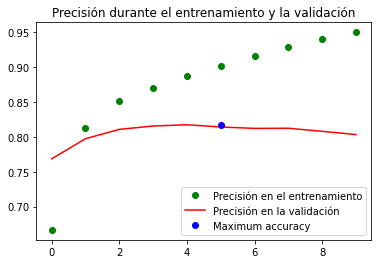

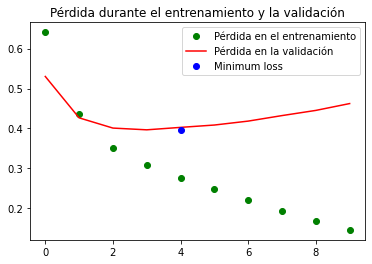

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

In [ ]:
!cp '/content/model_embedding_imdb.h5'  '/content/drive/My Drive/G3_AI_Lab_School/model_embedding_imdb.h5'